In [121]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns

In [122]:
test_video = 'test_breathing_crop_480x480.mp4'
print(os.path.isfile(test_video))

True


In [123]:
def extract_nth_frame(video_path, n, output_path=None):
    cap = cv2.VideoCapture(video_path)
    if n < 1 or n > int(cap.get(cv2.CAP_PROP_FRAME_COUNT)): return None

    for count in range(n-1):
       ret, _ = cap.read()
       if not ret or not cap.isOpened(): break

    ret, frame = cap.read()
    cap.release()
    if not ret: return None

    frame = cv2.flip(frame, 0)
    if output_path: cv2.imwrite(output_path, frame)
    return cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

In [124]:
n = 100
test_frame = extract_nth_frame(test_video, n)

In [552]:
mask = np.zeros(test_frame.shape[:2], dtype=np.uint8)
width, height = test_frame.shape[:2]
# cv2.rectangle(mask, (100, 50), (400, 200), 1, cv2.FILLED)
cv2.rectangle(mask, (0, height//2), (width, 0), 1, cv2.FILLED)
# mask = np.ones(test_frame.shape[:2], dtype=np.uint8)

test_frame_gray = cv2.cvtColor(test_frame, cv2.COLOR_RGB2GRAY)
# test_frame_gray = cv2.medianBlur(test_frame_gray, 25)
test_frame_gray = cv2.GaussianBlur(test_frame_gray, (25, 25), 0)

test_frame_gray = cv2.adaptiveThreshold(
        test_frame_gray,
        255,
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY,
        11,
        2)

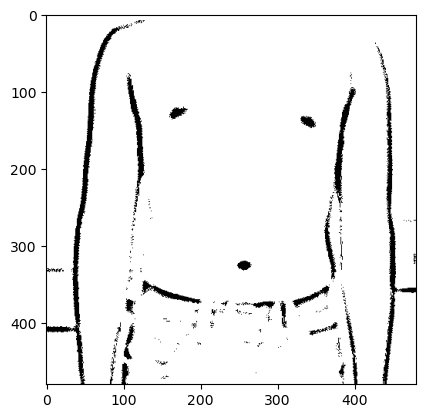

In [553]:
plt.figure()
plt.imshow(test_frame_gray, cmap='gray')
plt.show()

In [554]:
keypoints = cv2.goodFeaturesToTrack(test_frame_gray, mask=mask, 
                                    maxCorners=100,
                                    qualityLevel=0.3,
                                    minDistance=25)
kp1 = np.squeeze(keypoints)

In [555]:
sift = cv2.SIFT_create()
kp_sift = sift.detect(test_frame_gray, mask=mask)
kp2 = np.array([kp.pt for kp in kp_sift])

27


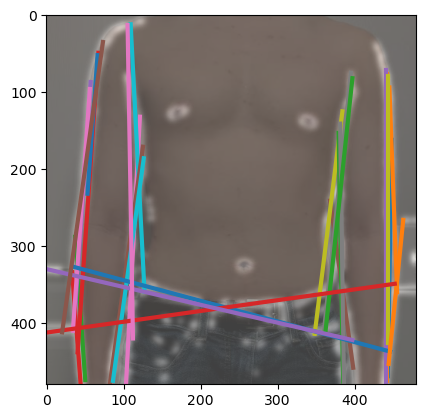

In [556]:
test_frame_edge = cv2.Canny(test_frame_gray, 50, 150)
test_frame_edge_smooth = cv2.GaussianBlur(test_frame_edge, (25, 25), 0)
lines = cv2.HoughLinesP(
        test_frame_edge, 
        rho=1, 
        theta=np.pi / 180, 
        threshold=50, 
        minLineLength=100,
        maxLineGap=200)
print(len(lines))
plt.figure()
plt.imshow(test_frame, alpha=0.5)
# plt.imshow(test_frame_edge, alpha=0.5)
plt.imshow(test_frame_edge_smooth, alpha=0.5, cmap='gray')
for (x1, y1, x2, y2), in lines:
    # plt.plot([x1, x2], [y1, y2], linewidth=20, alpha=0.5, color='white')
    plt.plot([x1, x2], [y1, y2], linewidth=3)
plt.show()

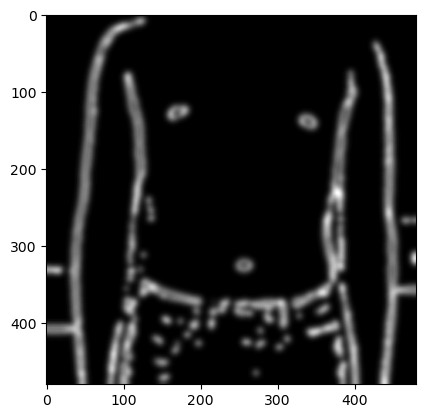

In [557]:
test_frame_edge_smooth = cv2.GaussianBlur(test_frame_edge, (25, 25), 0)
# test_frame_edge_smooth = cv2.medianBlur(test_frame_edge, 25)

plt.figure()
plt.imshow(test_frame_edge_smooth, cmap='gray')
plt.show()

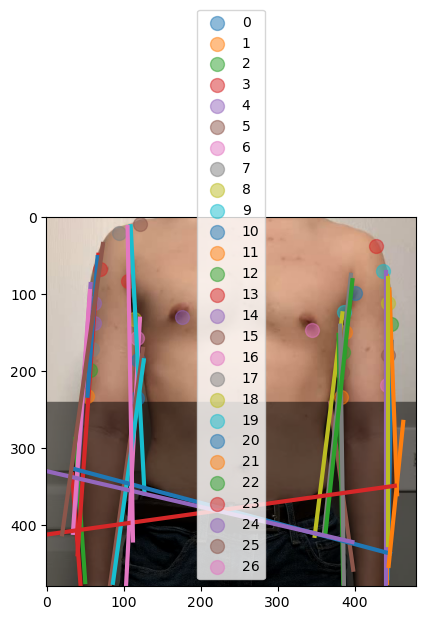

In [558]:
plt.figure()
plt.imshow(test_frame * np.dstack([mask]*3))
plt.imshow(test_frame, alpha=0.5)
for i, (x, y) in enumerate(kp1):
    plt.scatter(x, y, s=100, alpha=0.5, label=str(i))
for (x1, y1, x2, y2), in lines:
    # plt.plot([x1, x2], [y1, y2], linewidth=20, alpha=0.5, color='white')
    plt.plot([x1, x2], [y1, y2], linewidth=3)
plt.legend()
plt.show()